### Notes 

1. The Williams banana (commercially cultivated dessert banana) is variety of the Cavendish group

2. **NIR interactions**: NIR (Near-Infrared) interaction refers to how near-infrared light (wavelengths from roughly 780 to 2500 nanometers) 

3. The column headers in the dataset (350, 351, 352, etc.) represent the wavelength in nanometers (nm). The reason they start outside the theoretical NIR range is that the data was likely collected using a Vis-NIR (Visible-Near Infrared) spectrometer. 

4. Data starts at 350 nm, this falls into the UV-A (Ultraviolet-A) and Visible (violet light) parts of the electromagnetic spectrum.

5. The numbers within the cells (e.g., 6.10E-02) are the absorbance or reflectance values. They are typically unitless and represent how much light was absorbed or reflected by the sample at that specific wavelength.

The names in the "Tratamiento" column refer to common plant stressors. In this experiment, the "treatments" are the different types of stress intentionally applied to the plants to study their effects.

- **Control**: Healthy, unstressed plants used as a baseline for comparison.

- **Ralstonia & Fusarium:** Genera of a bacterium and a fungus, respectively, that are well-known plant pathogens. The plants in these groups were likely infected on purpose.

- **E_Hidrico:** This stands for "Estrés Hídrico," which is Spanish for Water Stress. These plants were likely subjected to drought conditions.

- **Combined Treatments (e.g., Ral_Fus, Fus_EH):** These represent plants subjected to multiple stressors at once (e.g., infected with both Ralstonia and Fusarium).

#### Purpose of the UV-A and NIR Data


Spectroscopy is used here as a non-destructive way to "see" the health of the plants by measuring how their leaves interact with light. The numbers in your columns are reflectance values, representing the fraction of light (from 0 to 1) that bounces off the leaf at each specific wavelength.

- **UV-A / Visible (350-780 nm):** This range reveals information about the plant's pigments. A healthy plant has lots of chlorophyll, which absorbs light in this region. A stressed plant's pigments degrade, causing its reflectance spectrum to change, especially around the "red edge" (~700 nm).

- **NIR (780-2500 nm):** This range is sensitive to the internal cell structure of the leaf and, most importantly, its chemical composition. Dips in reflectance in this region correspond to absorption by specific chemical bonds, such as water (O-H bonds) and organic compounds like cellulose and proteins (C-H and N-H bonds).

The overall goal is to capture a complete "spectral fingerprint" of each plant's physiological condition.

#### Important concepts 

- **Spectrophotometry**
- **Transmittance**
- **reflectance**

In [24]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.colors as mcolors
from IPython.display import clear_output

# import the first sheet of the dataset 

df = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=0)

df.head()

,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.061030,0.060394,0.053344,0.054736,0.057163,0.055928,0.049880,0.043096,...,0.044963,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752
1,Control,2,0.060823,0.060909,0.056016,0.056755,0.057975,0.056499,0.051715,0.047413,...,0.037656,0.037458,0.037266,0.037120,0.036929,0.036832,0.036861,0.036779,0.036661,0.036570
2,Control,3,0.059742,0.060113,0.057320,0.059280,0.059741,0.057078,0.053557,0.049205,...,0.036252,0.036049,0.035732,0.035558,0.035431,0.035338,0.035368,0.035286,0.035157,0.035058
3,Control,4,0.048861,0.047099,0.044486,0.049340,0.052701,0.050598,0.044007,0.038449,...,0.033894,0.033762,0.033693,0.033536,0.033412,0.033204,0.032831,0.032637,0.032501,0.032376
4,Control,5,0.063155,0.060788,0.057388,0.058424,0.060128,0.059009,0.053017,0.048921,...,0.033897,0.033729,0.033675,0.033571,0.033515,0.033441,0.033317,0.033257,0.033285,0.033205



6. **Row Pattern**: 
   - Data is organized in groups of 30 rows
   - Each group represents a complete set of plant measurements
   - Plant indices cycle from 1 to 30 before repeating
   - Treatment conditions change after each 30-row cycle

Let's proceed with visualizing this data structure to better understand the patterns and relationships between treatments and measurements.


In [25]:
# Display basic information about the dataset
print("Dataset Information:")
print("")
print(df.info())
print("\nDataset Shape:", df.shape)

# Display first and last few rows with better formatting
print("\nSample of the data:")
print("")
display(df)

# lets see the types of each column
print("\nColumn Data Types:")
print("")
print(df.dtypes)

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Columns: 2153 entries, Tratamiento to 2500
dtypes: float64(2151), int64(1), object(1)
memory usage: 3.9+ MB
None

Dataset Shape: (239, 2153)

Sample of the data:



,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.061030,0.060394,0.053344,0.054736,0.057163,0.055928,0.049880,0.043096,...,0.044963,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752
1,Control,2,0.060823,0.060909,0.056016,0.056755,0.057975,0.056499,0.051715,0.047413,...,0.037656,0.037458,0.037266,0.037120,0.036929,0.036832,0.036861,0.036779,0.036661,0.036570
2,Control,3,0.059742,0.060113,0.057320,0.059280,0.059741,0.057078,0.053557,0.049205,...,0.036252,0.036049,0.035732,0.035558,0.035431,0.035338,0.035368,0.035286,0.035157,0.035058
3,Control,4,0.048861,0.047099,0.044486,0.049340,0.052701,0.050598,0.044007,0.038449,...,0.033894,0.033762,0.033693,0.033536,0.033412,0.033204,0.032831,0.032637,0.032501,0.032376
4,Control,5,0.063155,0.060788,0.057388,0.058424,0.060128,0.059009,0.053017,0.048921,...,0.033897,0.033729,0.033675,0.033571,0.033515,0.033441,0.033317,0.033257,0.033285,0.033205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Fus_EH_Ral,26,0.057063,0.059019,0.048959,0.052269,0.056879,0.056852,0.052870,0.050356,...,0.040929,0.040795,0.040768,0.040668,0.040614,0.040498,0.040285,0.040192,0.040172,0.040053
235,Fus_EH_Ral,27,0.043311,0.046784,0.044599,0.046683,0.049327,0.049389,0.045266,0.040867,...,0.038794,0.038626,0.038348,0.038184,0.038121,0.038045,0.037970,0.037882,0.037866,0.037735
236,Fus_EH_Ral,28,0.059954,0.058892,0.053552,0.058789,0.064082,0.064322,0.060020,0.056157,...,0.052576,0.052374,0.052096,0.051908,0.051822,0.051660,0.051462,0.051327,0.051201,0.051083
237,Fus_EH_Ral,29,0.056337,0.056842,0.052092,0.054301,0.056672,0.055743,0.051817,0.050592,...,0.048587,0.048425,0.048334,0.048168,0.048052,0.047933,0.047718,0.047609,0.047601,0.047518



Column Data Types:

Tratamiento     object
Planta           int64
350            float64
351            float64
352            float64
                ...   
2496           float64
2497           float64
2498           float64
2499           float64
2500           float64
Length: 2153, dtype: object


In [26]:
# Check for missing values
print("\nMissing Values in Each Column:")
print("")
print(df.isnull().sum())
print("\nTotal Missing Values in Dataframe:", df.isnull().sum().sum())


Missing Values in Each Column:

Tratamiento    0
Planta         0
350            0
351            0
352            0
              ..
2496           0
2497           0
2498           0
2499           0
2500           0
Length: 2153, dtype: int64

Total Missing Values in Dataframe: 0


In [27]:
# Let's check the different unique values in the treatment column
print("\nUnique Values in 'treatment' Column:")
print("")
print(df['Tratamiento'].unique())
print("\nNumber of Unique Values in 'treatment' Column:", df['Tratamiento'].nunique())


Unique Values in 'treatment' Column:

['Control' 'Ralstonia' 'Fusarium' 'E_Hidrico' 'Ral_Fus' 'Ral_EH' 'Fus_EH'
 'Fus_EH_Ral']

Number of Unique Values in 'treatment' Column: 8


### Single and Multiple Plant Analysis

Now let's create a plot with the information from just one plant to analyze how the data behaves.

_This visualization will help us understand the spectral response patterns of an individual specimen._

In [28]:
first_plant = df.iloc[0]
print(first_plant)

Tratamiento     Control
Planta                1
350             0.06103
351            0.060394
352            0.053344
                 ...   
2496           0.044198
2497           0.044046
2498           0.043928
2499           0.043878
2500           0.043752
Name: 0, Length: 2153, dtype: object


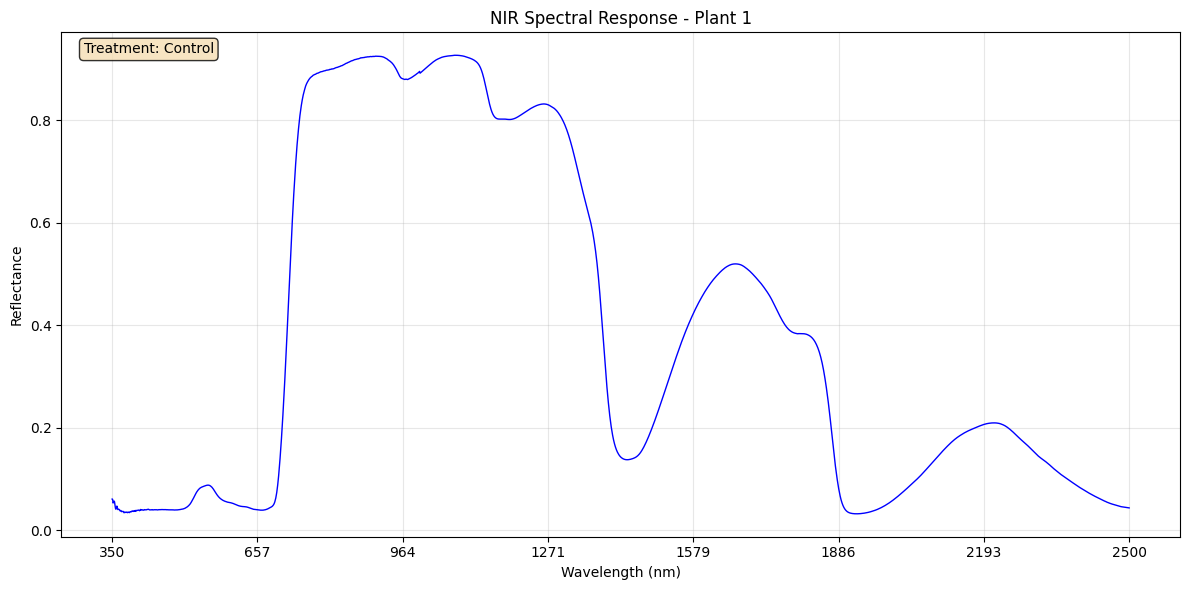

In [29]:
# Get first plant data (row 0)
treatment = first_plant['Tratamiento']

# Extract wavelengths (column names from 350 to 2500)
wavelengths = [int(col) for col in df.columns if str(col).isdigit()]
absorbance_values = first_plant[wavelengths].values

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, absorbance_values, 'b-', linewidth=1)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title(f'NIR Spectral Response - Plant 1')
plt.text(0.02, 0.98, f'Treatment: {treatment}', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

From this initial data visualization, we can already see a strong reflectance in wavelengths ranging from approximately 657 to 1300 nm. The spectral response also shows several interesting spikes at specific wavelengths across the measured spectrum.

Let's visualize another plant from another treatment.

In [30]:
second_plant = df.iloc[55]
print(second_plant)

Tratamiento    Ralstonia
Planta                26
350             0.035054
351             0.034996
352             0.032356
                 ...    
2496            0.040336
2497             0.04006
2498            0.039875
2499            0.039604
2500            0.039546
Name: 55, Length: 2153, dtype: object


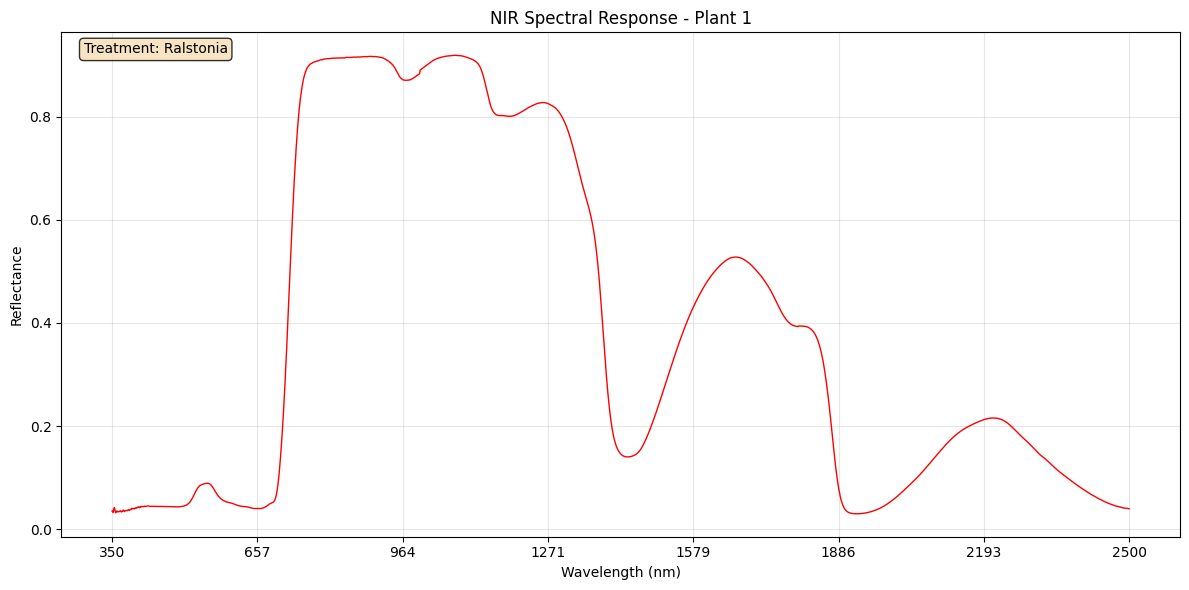

In [31]:
# Get first plant data (row 0)
treatment = second_plant['Tratamiento']

# Extract wavelengths (column names from 350 to 2500)
absorbance_values = second_plant[wavelengths].values

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, absorbance_values, 'r-', linewidth=1)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title(f'NIR Spectral Response - Plant 1')
plt.text(0.02, 0.98, f'Treatment: {treatment}', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The two graphs seem nearly identical initially, displaying analogous patterns and trends. To definitively determine the extent of their similarity and highlight any subtle differences, we can superimpose one graph directly onto the other.

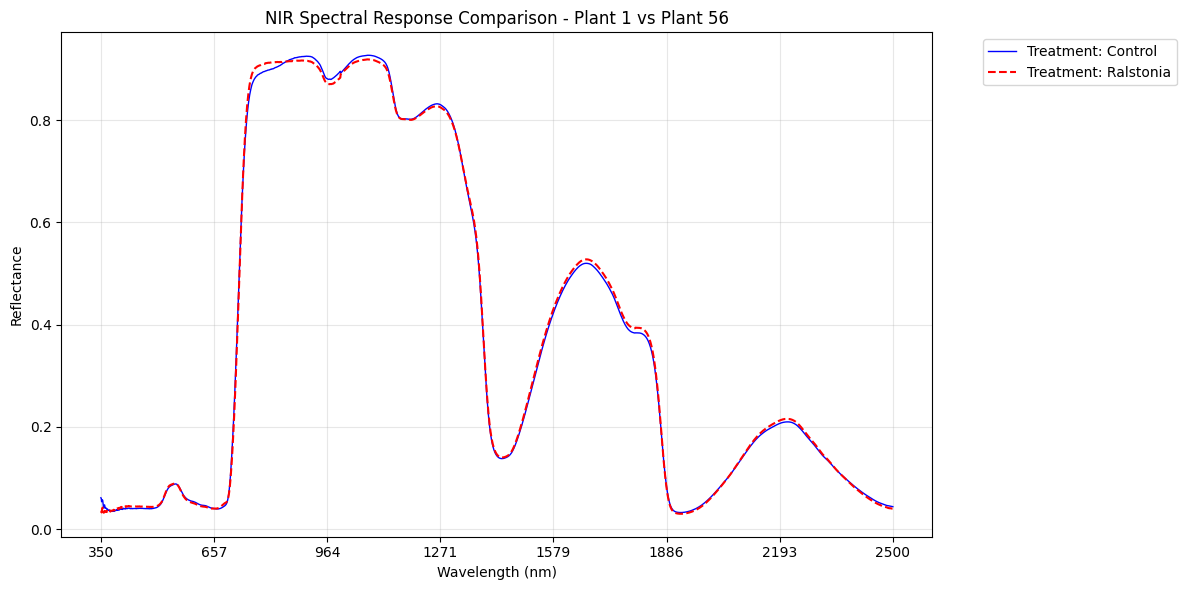

In [32]:
# Extract wavelengths and values
values_plant1 = first_plant[wavelengths].values
values_plant2 = second_plant[wavelengths].values

# Create plot
plt.figure(figsize=(12, 6))

# Plot both lines
plt.plot(wavelengths, values_plant1, 'b-', linewidth=1, label=f'Treatment: {first_plant["Tratamiento"]}')
plt.plot(wavelengths, values_plant2, 'r--', linewidth=1.5, label=f'Treatment: {second_plant["Tratamiento"]}')

# Customize plot
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('NIR Spectral Response Comparison - Plant 1 vs Plant 56')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

Although both plants follow the same overall spectral pattern, a closer inspection reveals subtle but important discrepancies. A noticeable deviation occurs between 700 nm and 1100 nm, where the plant that received the Ralstonia treatment exhibits a different response. This is a critical observation because this specific region of the spectrum is highly sensitive to changes in plant water content and internal leaf structure. A bacterial wilt pathogen like Ralstonia directly impacts these physiological traits, which likely explains the divergence.

Interestingly, despite this key difference, it's also important to note that in regions where the reflectance changes sharply (i.e., the steepest slopes of the graph), the values for both plants remain numerically almost identical.

### Multiple Plant Analysis

Given the strong similarity observed between the two treatment groups, the next logical step is to compare individual samples. We will now examine the first plant from each treatment to determine if their spectral profiles are also consistent with this overall pattern.

Number of plants with index 1: 8


,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.061030,0.060394,0.053344,0.054736,0.057163,0.055928,0.049880,0.043096,...,0.044963,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752
30,Ralstonia,1,0.043966,0.042302,0.035784,0.042035,0.047908,0.047581,0.042502,0.041224,...,0.051744,0.051592,0.051519,0.051325,0.051100,0.050865,0.050522,0.050303,0.050151,0.049952
59,Fusarium,1,0.052970,0.052951,0.050342,0.052310,0.054962,0.054251,0.047551,0.044587,...,0.033423,0.033262,0.032987,0.032827,0.032693,0.032523,0.032385,0.032245,0.032055,0.031927
89,E_Hidrico,1,0.054882,0.054667,0.052255,0.052829,0.053812,0.053243,0.050148,0.045144,...,0.035031,0.034850,0.034596,0.034470,0.034403,0.034244,0.034139,0.033972,0.033677,0.033495
119,Ral_Fus,1,0.037626,0.041858,0.038626,0.038292,0.041361,0.044479,0.042495,0.037116,...,0.039783,0.039585,0.039210,0.038957,0.038787,0.038585,0.038352,0.038199,0.038115,0.037993
149,Ral_EH,1,0.050782,0.054261,0.053234,0.056822,0.059259,0.058426,0.055467,0.050375,...,0.036772,0.036628,0.036380,0.036291,0.036240,0.036101,0.036043,0.035940,0.035679,0.035507
179,Fus_EH,1,0.046154,0.039880,0.050982,0.049221,0.047103,0.046526,0.041268,0.043100,...,0.030383,0.030271,0.030071,0.029961,0.029788,0.029691,0.029715,0.029651,0.029528,0.029420
209,Fus_EH_Ral,1,0.047777,0.046645,0.048892,0.051673,0.053033,0.053116,0.053037,0.046225,...,0.050267,0.050067,0.049776,0.049581,0.049439,0.049275,0.049119,0.049004,0.048913,0.048842


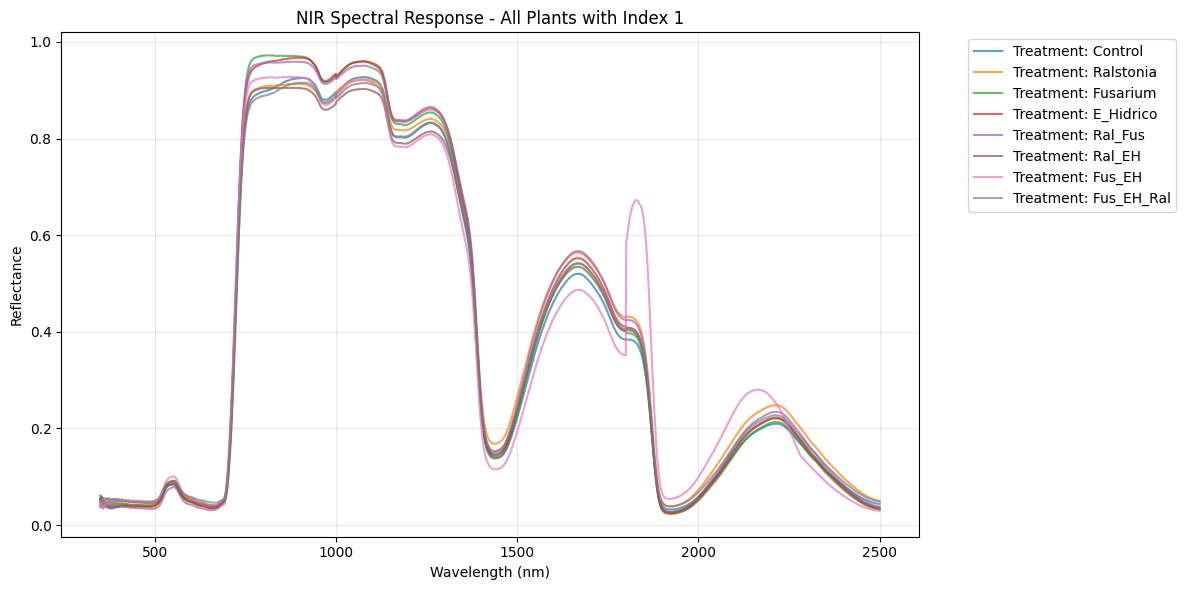

In [33]:
# Filter rows where plant index is 1
plants_index_1 = df[df['Planta'] == 1]

# Display the filtered data
print("Number of plants with index 1:", len(plants_index_1))
display(plants_index_1)

# Create a plot comparing all plants with index 1
plt.figure(figsize=(12, 6))

# Plot each plant with index 1
for idx, row in plants_index_1.iterrows():
    wavelengths = [int(col) for col in df.columns if str(col).isdigit()]
    values = row[wavelengths].values
    plt.plot(wavelengths, values, label=f'Treatment: {row["Tratamiento"]}', alpha=0.7)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('NIR Spectral Response - All Plants with Index 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Analysis of Mean Spectral Trends (First Plant)
This analysis of the mean spectra reveals distinct and significant differences between the treatment groups.

**Variation in the Near-Infrared (NIR) Plateau:** A key area of variation is the 700-1000 nm range. In this region, which is highly sensitive to leaf cellular structure and density, three of the eight treatments cause a notably different light reflectance compared to the others. This suggests these specific treatments are having a significant impact on the plant's physical structure or overall vigor. 

**Anomalous Behavior of the Fus_EH Treatment:** The Fus_EH treatment exhibits a particularly unique spectral signature. While its spectrum follows the general trend up to approximately 1500 nm, it diverges significantly in the 1500-2500 nm range. This region is dominated by absorption features related to water, cellulose, and proteins. The complex and distinct pattern shown by the Fus_EH treatment likely reflects profound physiological changes in the plant, such as altered water status or degradation of organic compounds, which would be consistent with a response to a pathogenic fungus.

## Analysis: Mean vs. Individual Spectral Behavior
An insightful approach is to plot the average spectral behavior against individual spectra. This comparison can be performed at two different levels: by plant and by treatment, with each level offering unique insights into the data.

1. **By Plant (Intra-Group Variability)**

Plotting an individual plant's spectrum against the mean spectrum of its own treatment group helps reveal the variability within that group. This analysis allows us to assess the consistency of the treatment's effect. It answers key questions such as: Do all plants under the same treatment react uniformly, or are there outliers that respond differently?

2. **By Treatment (Inter-Group Variability)**

Comparing the mean spectrum of one treatment group against another (for instance, a treatment group versus the control group) is fundamental. This plot directly quantifies the overall impact of a treatment, clearly showing which treatments induce the most significant and observable spectral changes and at which specific wavelengths those changes occur.


### 1. By plant:

The full dataset, which includes 30 plants across a very wide spectral range, can be difficult to interpret in a single plot. To create a clearer and more focused visualization, we will generate a new plot with two key adjustments:

1. **Focus on Wavelength Range:** We will zoom in on the 700 nm to 1378 nm region. This is the most informative area for this analysis, as it contains the primary reflectance plateau, a spectral feature whose magnitude is directly related to the plant's health and cellular structure.

2. **Subset the Data:** To avoid visual clutter from too many overlapping lines, the plot will only display the spectra for seven plants chosen randomly. This allows for a much clearer comparison of their individual spectral shapes and features. 

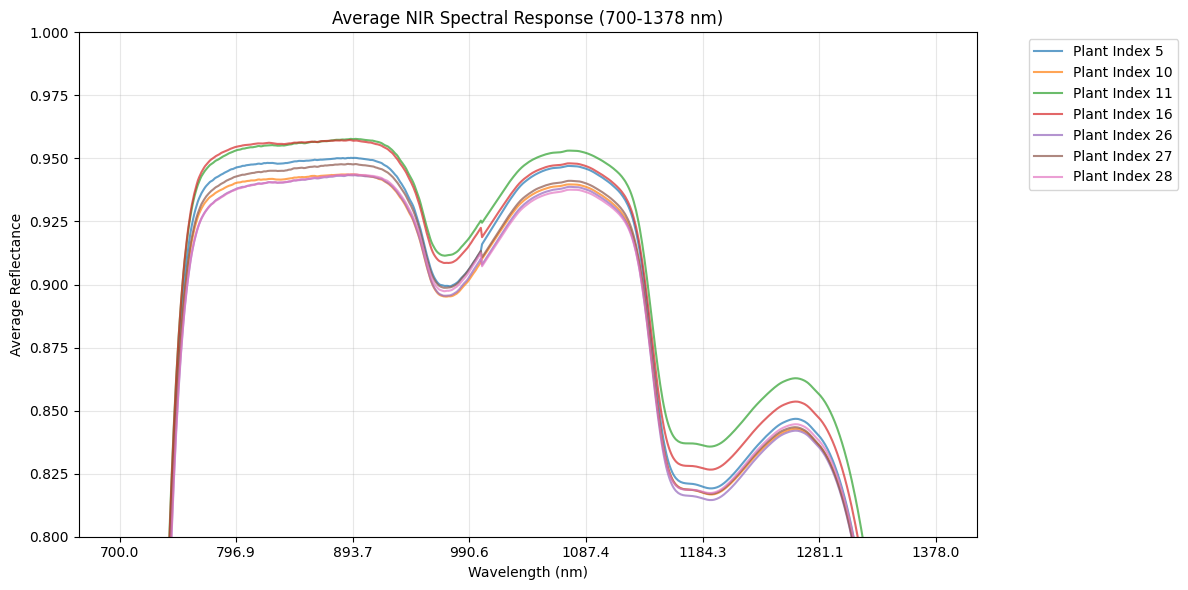

In [34]:
import random

# Create a single figure for all plant indices
plt.figure(figsize=(12, 6))

# Filter wavelengths between 700 and 1378
wavelengths = [int(col) for col in df.columns if str(col).isdigit() and 700 <= int(col) <= 1378]

# Plot average curves for each plant index
for plant_index in np.sort(random.sample(range(1, 31), 7)):  # Randomly select 7 plant indices from 1 to 30
    # Filter rows for the current plant index
    plants_index = df[df['Planta'] == plant_index]
    
    # Calculate the mean reflectance values across all plants with this index
    mean_values = plants_index[wavelengths].mean()
    
    # Plot the average values for this plant index
    plt.plot(wavelengths, mean_values, linewidth=1.5, label=f'Plant Index {plant_index}', alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Reflectance')
plt.title('Average NIR Spectral Response (700-1378 nm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))

# Set y-axis limits to zoom in on the differences
plt.ylim(0.8, 1) 

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


### 2. By treatment

We will now analyze the treatment effects in two focused stages:

1. **Peak Response Analysis (700-1378 nm)**

First, let's examine the point of maximum difference in the spectral responses within the same interval as the last plot (700-1378 nm). By isolating the single wavelength where the treatments show the greatest divergence, we can better quantify the most significant impact on the plant's cellular structure and health.

2. **Anomaly Detection (1400-2500 nm)**

Next, we will conduct an anomaly analysis in the 1400-2500 nm range. This region is highly sensitive to the plant's chemical composition (e.g., water, lignin, cellulose). Searching for behavior that deviates sharply from the average allows us to pinpoint unique physiological responses or unexpected chemical changes induced by specific treatments.

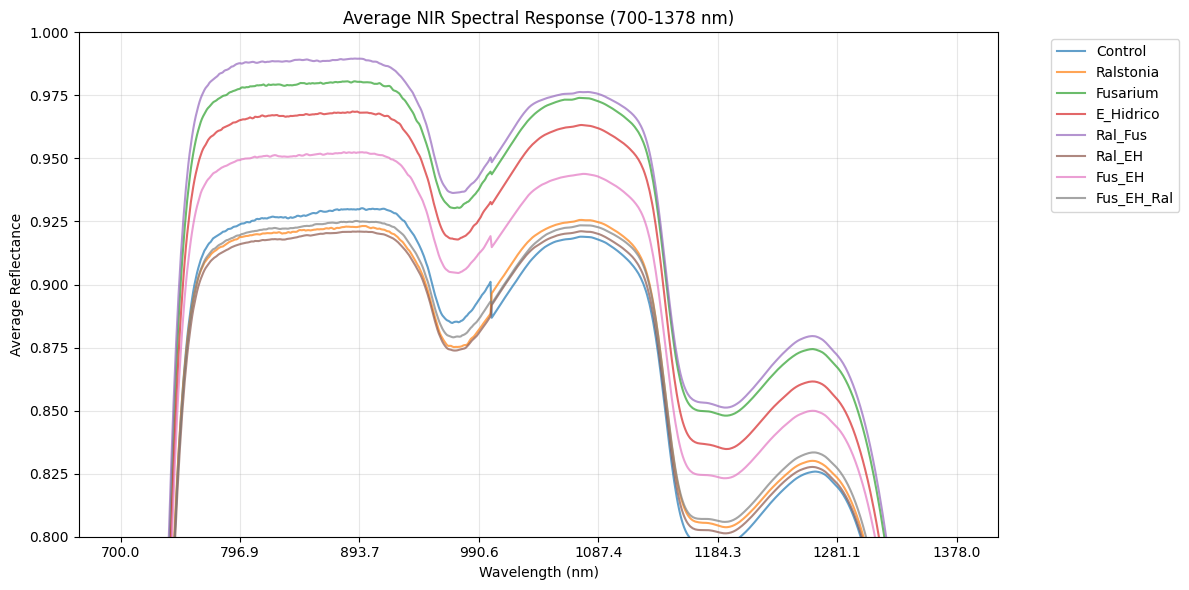

In [35]:
# Create a single figure for all plant indices
plt.figure(figsize=(12, 6))

# Filter wavelengths between 700 and 1378
wavelengths = [int(col) for col in df.columns if str(col).isdigit() and 700 <= int(col) <= 1378]

# Plot average curves for each treatment
for treatment in df['Tratamiento'].unique(): 
    # Filter rows for the current treatment
    plants_index = df[df['Tratamiento'] == treatment]

    # Calculate the mean reflectance values across all plants with this treatment
    mean_values = plants_index[wavelengths].mean()

    # Plot the average values for this treatment
    plt.plot(wavelengths, mean_values, linewidth=1.5, label=f'{treatment}', alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Reflectance')
plt.title('Average NIR Spectral Response (700-1378 nm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))

# Set y-axis limits to zoom in on the differences
plt.ylim(0.8, 1) 

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

#### **Peak Response Analysis (700-1378 nm)**
This analysis of the plot reveals a couple of interesting findings:

#### 1. Ranking Treatments by Average Reflectance
Within this specific wavelength range, we can clearly rank the treatments based on their average reflectance. This allows us to identify the top three treatments that induced the highest reflectance in the plants. Higher reflectance in this NIR (Near-Infrared) region often correlates with more robust internal leaf structure and healthier vegetation, suggesting these treatments had a positive physiological impact. 

#### 2. Absorption Feature Around 1000 nm
There's an interesting dip in the average reflectance for the control treatment at approximately 1000 nm. This dip represents an absorption feature, indicating that specific chemical bonds within the plant tissue are absorbing more energy at this particular wavelength.

Crucially, this absorption feature is noticeably mitigated or less pronounced in the other treatment groups. This suggests that the treatments are inducing a physiological or chemical change in the plants that directly alters their absorptive properties in this narrow spectral region. While the specific bond causing the absorption is not identified, the difference between the control and the treatments points to a subtle but potentially significant effect.

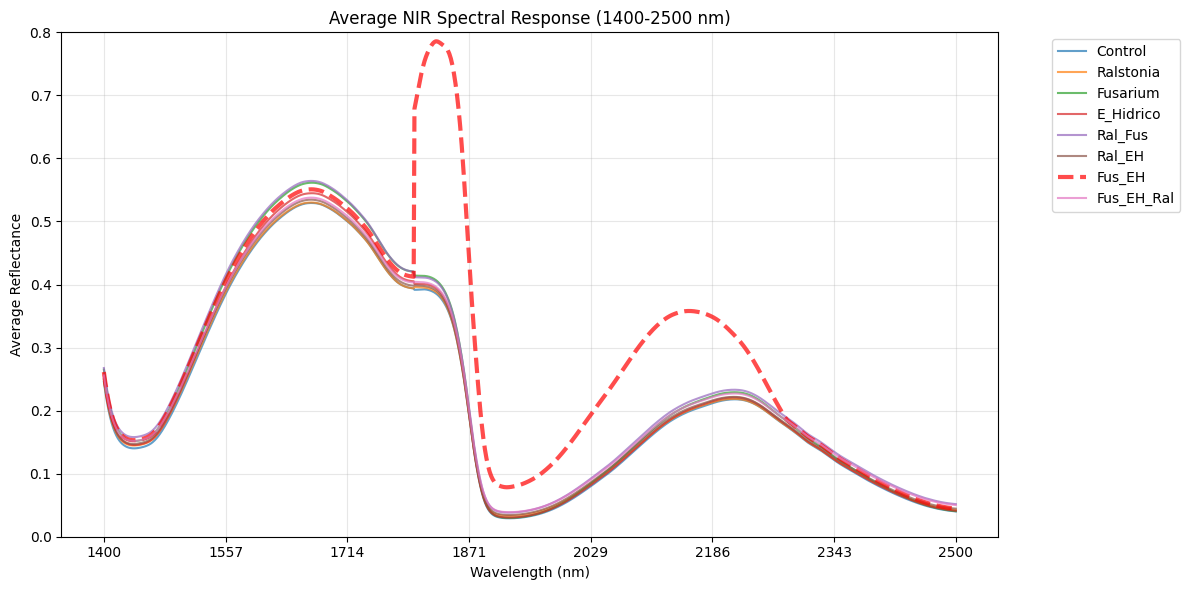

In [36]:
# Create a single figure for all plant indices
plt.figure(figsize=(12, 6))

# Filter wavelengths between 1400 and 2500
wavelengths = [int(col) for col in df.columns if str(col).isdigit() and 1400 <= int(col) <= 2500]

# Plot average curves for each treatment
for treatment in df['Tratamiento'].unique(): 
    # Filter rows for the current treatment
    plants_index = df[df['Tratamiento'] == treatment]

    # Calculate the mean reflectance values across all plants with this treatment
    mean_values = plants_index[wavelengths].mean()

    if treatment == 'Fus_EH':
        # Highlight this treatment with a thicker line, different style and color
        plt.plot(wavelengths, mean_values, linestyle='--', linewidth=3, color='red', label=f'{treatment}', alpha=0.7)
        continue
    else:
        # Plot the average values for this treatment
        plt.plot(wavelengths, mean_values, linewidth=1.5, label=f'{treatment}', alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Reflectance')
plt.title('Average NIR Spectral Response (1400-2500 nm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))

# Set y-axis limits to zoom in on the differences
plt.ylim(0, 0.8) 

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

#### **Anomaly Detection (1400-2500 nm)**

Despite the general similarity among the curves, the Fus_EH treatment exhibits a clear and distinct anomaly. A noticeable spike in reflectance appears in the 1750 nm to 1871 nm range, causing the spectrum for this treatment to completely diverge from the others.

This spectral region is typically associated with absorption by organic compounds rich in C-H bonds, such as lignin and cellulose, which are key components of plant cell walls. A prominent spike like this suggests a significant alteration in the chemical composition of the plant tissue. This is an intriguing response, as it likely indicates a direct physiological impact from the treatment, possibly affecting the plant's structural integrity.

In [37]:

# Create a color dictionary for treatments
unique_treatments = df['Tratamiento'].unique()
colors = list(mcolors.TABLEAU_COLORS.values())
treatment_colors = {treatment: colors[i % len(colors)] for i, treatment in enumerate(unique_treatments)}

# Create a function that builds our interactive visualization
def create_spectral_explorer():
    # Extract wavelength ranges
    all_wavelengths = [int(col) for col in df.columns if str(col).isdigit()]
    vis_nir_boundary = 780
    
    # Create figure with subplots
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{"colspan": 2}, None],
               [{}, {}]],
        row_heights=[0.6, 0.4],
        subplot_titles=["Plant Spectral Response Explorer", 
                        "Statistical Distribution", 
                        "Treatment Comparison"]
    )
    
    # Add empty traces to populate later
    fig.add_trace(go.Scatter(x=[0], y=[0], mode='lines', name='Main Plot'), row=1, col=1)
    fig.add_trace(go.Box(y=[0], name='Box Plot'), row=2, col=1)
    fig.add_trace(go.Bar(x=[0], y=[0], name='Bar Chart'), row=2, col=2)
    
    # Set initial layout
    fig.update_layout(
        title={
            'text': "NIR Spectroscopy Interactive Explorer",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 24, 'color': 'darkblue'}
        },
        height=900,
        width=1200,
        template="plotly_white",
        legend={'itemsizing': 'constant'},
        hoverlabel={'font_size': 12, 'font_family': 'Arial'}
    )
    
    # Create widgets for interaction
    treatment_selector = widgets.SelectMultiple(
        options=list(unique_treatments),
        value=['Control', 'Fus_EH'],  # Default selected treatments
        description='Treatments:',
        disabled=False,
        layout=widgets.Layout(width='350px')
    )
    
    region_selector = widgets.RadioButtons(
        options=[('Full Spectrum', 'full'), 
                 ('NIR Plateau (700-1378 nm)', 'nir_plateau'), 
                 ('Chemical Region (1400-2500 nm)', 'chemical')],
        description='Region:',
        disabled=False
    )
    
    plant_selector = widgets.Dropdown(
        options=[('All Plants (Average)', 'all')] + 
                [(f'Plant {i}', i) for i in range(1, 31)],
        value='all',
        description='Plant:',
        disabled=False,
        layout=widgets.Layout(width='200px')
    )
    
    display_type = widgets.ToggleButtons(
        options=['Line', 'Area', 'Heatmap'],
        value='Line',
        description='Display:',
        disabled=False,
        button_style='',
        tooltips=['Show as lines', 'Show as filled areas', 'Show as heatmap']
    )
    
    variance_toggle = widgets.Checkbox(
        value=False,
        description='Show Variance',
        disabled=False,
        indent=False
    )
    
    highlight_toggle = widgets.ToggleButtons(
        options=['None', 'Visible Range', 'NIR Range', 'Key Absorption Bands'],
        value='None',
        description='Highlight:',
        disabled=False
    )
    
    # Create annotation output
    annotation_output = widgets.Output()
    
    # Define function to update the plot
    def update_plot(*args):
        selected_treatments = treatment_selector.value
        selected_region = region_selector.value
        selected_plant = plant_selector.value
        selected_display = display_type.value
        show_variance = variance_toggle.value
        highlight_option = highlight_toggle.value
        
        # Initialize z_data here to avoid UnboundLocalError later
        z_data = []

        # Filter wavelengths based on selected region
        if selected_region == 'nir_plateau':
            wavelengths = [w for w in all_wavelengths if 700 <= w <= 1378]
            y_min, y_max = 0.8, 1.0  # Based on previous plots
        elif selected_region == 'chemical':
            wavelengths = [w for w in all_wavelengths if 1400 <= w <= 2500]
            y_min, y_max = 0, 0.8  # Based on previous plots
        else:  # full spectrum
            wavelengths = all_wavelengths
            y_min, y_max = 0, 1.0
        
        # Clear existing traces
        fig.data = []
        
        # Statistical data storage
        box_data = []
        bar_labels = []
        bar_values = []
        
        # Add background highlights if requested
        if highlight_option == 'Visible Range':
            fig.add_shape(type="rect",
                         x0=min(wavelengths), x1=vis_nir_boundary,
                         y0=y_min, y1=y_max,
                         fillcolor="rgba(173, 216, 230, 0.2)",
                         line_width=0,
                         layer="below",
                         row=1, col=1)
            fig.add_annotation(x=(min(wavelengths)+vis_nir_boundary)/2, 
                              y=y_max*0.95,
                              text="Visible",
                              showarrow=False,
                              row=1, col=1)
        
        if highlight_option == 'NIR Range':
            fig.add_shape(type="rect",
                         x0=vis_nir_boundary, x1=max(wavelengths),
                         y0=y_min, y1=y_max,
                         fillcolor="rgba(255, 228, 196, 0.2)",
                         line_width=0,
                         layer="below",
                         row=1, col=1)
            fig.add_annotation(x=(vis_nir_boundary+max(wavelengths))/2, 
                              y=y_max*0.95,
                              text="Near Infrared",
                              showarrow=False,
                              row=1, col=1)
        
        if highlight_option == 'Key Absorption Bands':
            # Water absorption bands
            water_bands = [(1400, 1500), (1900, 2000)]
            for band in water_bands:
                if band[0] >= min(wavelengths) and band[1] <= max(wavelengths):
                    fig.add_shape(type="rect",
                                 x0=band[0], x1=band[1],
                                 y0=y_min, y1=y_max,
                                 fillcolor="rgba(135, 206, 250, 0.3)",
                                 line_width=0,
                                 layer="below",
                                 row=1, col=1)
                    fig.add_annotation(x=(band[0]+band[1])/2, 
                                      y=y_max*0.9,
                                      text="H₂O",
                                      showarrow=False,
                                      row=1, col=1)
            
            # Cellulose/lignin absorption
            if 2200 >= min(wavelengths) and 2300 <= max(wavelengths):
                fig.add_shape(type="rect",
                             x0=2200, x1=2300,
                             y0=y_min, y1=y_max,
                             fillcolor="rgba(152, 251, 152, 0.3)",
                             line_width=0,
                             layer="below",
                             row=1, col=1)
                fig.add_annotation(x=2250, 
                                  y=y_max*0.85,
                                  text="C-H",
                                  showarrow=False,
                                  row=1, col=1)
        
        # Plot data based on selection
        for treatment in selected_treatments:
            treatment_data = df[df['Tratamiento'] == treatment]
            
            if selected_plant == 'all':
                # Calculate mean and std for all plants with this treatment
                mean_values = treatment_data[wavelengths].mean().values
                std_values = treatment_data[wavelengths].std().values
                
                if selected_display == 'Line':
                    # Add mean line
                    fig.add_trace(
                        go.Scatter(
                            x=wavelengths,
                            y=mean_values,
                            mode='lines',
                            name=f'{treatment} (mean)',
                            line=dict(color=treatment_colors[treatment], width=3),
                            hovertemplate='Wavelength: %{x} nm<br>Reflectance: %{y:.4f}<extra></extra>'
                        ), row=1, col=1
                    )
                    
                    # Add variance if requested
                    if show_variance:
                        fig.add_trace(
                            go.Scatter(
                                x=wavelengths,
                                y=mean_values + std_values,
                                mode='lines',
                                line=dict(width=0),
                                showlegend=False,
                                hoverinfo='skip'
                            ), row=1, col=1
                        )
                        fig.add_trace(
                            go.Scatter(
                                x=wavelengths,
                                y=mean_values - std_values,
                                mode='lines',
                                line=dict(width=0),
                                fill='tonexty',
                                fillcolor=f'rgba{tuple(list(int(treatment_colors[treatment].lstrip("#")[i:i+2], 16) for i in (0, 2, 4)) + [0.2])}',
                                showlegend=False,
                                hoverinfo='skip'
                            ), row=1, col=1
                        )
                
                elif selected_display == 'Area':
                    fig.add_trace(
                        go.Scatter(
                            x=wavelengths,
                            y=mean_values,
                            mode='lines',
                            fill='tozeroy',
                            name=treatment,
                            line=dict(color=treatment_colors[treatment]),
                            fillcolor=f'rgba{tuple(list(int(treatment_colors[treatment].lstrip("#")[i:i+2], 16) for i in (0, 2, 4)) + [0.3])}',
                            hovertemplate='Wavelength: %{x} nm<br>Reflectance: %{y:.4f}<extra></extra>'
                        ), row=1, col=1
                    )
                
                # Calculate statistics for bottom plots
                if len(wavelengths) > 0:
                    # Get average reflectance for the selected range
                    avg_refl = mean_values.mean()
                    bar_labels.append(treatment)
                    bar_values.append(avg_refl)
                    
                    # Store individual plant values for box plot
                    plant_avgs = []
                    for _, plant_row in treatment_data.iterrows():
                        plant_values = [float(plant_row[w]) for w in wavelengths]
                        plant_avgs.append(np.mean(plant_values))
                    
                    box_data.append({
                        'y': plant_avgs,
                        'type': 'box',
                        'name': treatment,
                        'marker': {'color': treatment_colors[treatment]}
                    })
                
            else:
                # Select specific plant
                plant_data = treatment_data[treatment_data['Planta'] == selected_plant]
                if len(plant_data) > 0:
                    plant_row = plant_data.iloc[0]
                    plant_values = [float(plant_row[w]) for w in wavelengths]
                    
                    fig.add_trace(
                        go.Scatter(
                            x=wavelengths,
                            y=plant_values,
                            mode='lines',
                            name=f'{treatment} - Plant {selected_plant}',
                            line=dict(color=treatment_colors[treatment]),
                            hovertemplate='Wavelength: %{x} nm<br>Reflectance: %{y:.4f}<extra></extra>'
                        ), row=1, col=1
                    )
        
        # Add heatmap if selected
        if selected_display == 'Heatmap' and selected_plant == 'all':
            # Create a matrix for the heatmap
            z_data = []
            y_labels = []
            
            for treatment in selected_treatments:
                treatment_data = df[df['Tratamiento'] == treatment]
                mean_values = treatment_data[wavelengths].mean().values
                z_data.append(mean_values)
                y_labels.append(treatment)
            
            if z_data:  # Only add if we have data
                fig.add_trace(
                    go.Heatmap(
                        z=z_data,
                        x=wavelengths,
                        y=y_labels,
                        colorscale='Viridis',
                        colorbar=dict(title='Reflectance'),
                        hovertemplate='Wavelength: %{x} nm<br>Treatment: %{y}<br>Reflectance: %{z:.4f}<extra></extra>'
                    ), row=1, col=1
                )
        
        # Update box plots
        for box in box_data:
            fig.add_trace(box, row=2, col=1)
        
        # Update bar chart
        fig.add_trace(
            go.Bar(
                x=bar_labels,
                y=bar_values,
                marker_color=[treatment_colors[t] for t in bar_labels],
                hovertemplate='Treatment: %{x}<br>Avg Reflectance: %{y:.4f}<extra></extra>'
            ), row=2, col=2
        )
        
        # Update layout
        fig.update_xaxes(title_text="Wavelength (nm)", row=1, col=1)
        fig.update_yaxes(title_text="Reflectance", range=[y_min, y_max], row=1, col=1)
        
        fig.update_xaxes(title_text="Treatment", row=2, col=2)
        fig.update_yaxes(title_text="Average Reflectance", row=2, col=2)
        
        fig.update_yaxes(title_text="Reflectance Distribution", row=2, col=1)
        
        # Add annotations for key insights
        with annotation_output:
            annotation_output.clear_output()
            
            print(f"Spectral Analysis Summary:")
            print("--------------------------")
            
            if len(selected_treatments) > 1:
                # Find wavelength of maximum difference between treatments
                if selected_plant == 'all' and len(z_data) > 1:
                    max_diff_idx = np.argmax(np.max(z_data, axis=0) - np.min(z_data, axis=0))
                    max_diff_wavelength = wavelengths[max_diff_idx]
                    print(f"Maximum reflectance difference occurs at {max_diff_wavelength} nm")
                    
                    # Highlight this on the plot
                    fig.add_shape(
                        type="line",
                        x0=max_diff_wavelength, x1=max_diff_wavelength,
                        y0=y_min, y1=y_max,
                        line=dict(color="red", width=2, dash="dash"),
                        row=1, col=1
                    )
                    fig.add_annotation(
                        x=max_diff_wavelength,
                        y=y_min + (y_max-y_min)*0.1,
                        text="Max Difference",
                        showarrow=True,
                        arrowhead=2,
                        ax=20,
                        ay=-30,
                        row=1, col=1
                    )
            
            # Calculate and display key statistics
            if bar_values:
                max_treatment = bar_labels[np.argmax(bar_values)]
                min_treatment = bar_labels[np.argmin(bar_values)]
                print(f"Highest average reflectance: {max_treatment} ({max(bar_values):.4f})")
                print(f"Lowest average reflectance: {min_treatment} ({min(bar_values):.4f})")
                
                # Look for anomalies if we're in the chemical region
                if selected_region == 'chemical':
                    print("\nKey Observations:")
                    if 'Fus_EH' in selected_treatments:
                        print("- Fusarium with Water Stress (Fus_EH) shows anomalous behavior in 1750-1871 nm range")
                        print("  This may indicate alterations in cellulose/lignin content.")
            
            print("\nInteraction Tips:")
            print("- Click and drag to zoom into regions of interest")
            print("- Double-click to reset the zoom")
            print("- Hover over lines for precise values")
        
        return fig
    
    # Wire up the widgets to the update function
    out = widgets.interactive_output(update_plot, {
        'a': widgets.fixed(0),  # Dummy variable to trigger the update
    })
    
    # Create layout
    controls = widgets.VBox([
        widgets.HBox([
            widgets.VBox([treatment_selector, plant_selector]),
            widgets.VBox([region_selector, display_type]),
            widgets.VBox([variance_toggle, highlight_toggle])
        ]),
        annotation_output
    ])
    
    # Wire up the widgets to the update function - fix the TypeError
    out = widgets.Output()

    # Create observer functions for each widget
    def observe_widget(*args):
        with out:
            clear_output(wait=True)
            display(update_plot())

    treatment_selector.observe(observe_widget, names='value')
    region_selector.observe(observe_widget, names='value')
    plant_selector.observe(observe_widget, names='value')
    display_type.observe(observe_widget, names='value')
    variance_toggle.observe(observe_widget, names='value')
    highlight_toggle.observe(observe_widget, names='value')

    
    # Initialize the plot
    with out:
        display(update_plot())

    # Return the complete widget
    return widgets.VBox([controls, out])

# Create and display the visualization
HTML("""
<style>
.output_scroll {
    height: auto !important;
    max-height: 1200px;
}
</style>
""")

# Display the interactive explorer
display(create_spectral_explorer())